In [1]:
import razor
import razor.flow as rf
from razor import api
from razor.flow.spark import SparkBlock, SparkExecutor
import typing as t

In [2]:
import os
from datetime import datetime, timedelta
from pyspark.sql import SparkSession, functions
from pyspark.sql.dataframe import DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [3]:

from razor.project.blocks.sourya_spark_blocks import NonSparkCols
from razor.project.blocks.sourya_spark_blocks import ReadCsvProjectSpace
from razor.project.blocks.sourya_spark_blocks import NonSparkPath
from razor.project.blocks.sourya_spark_blocks import DropDuplicates
from razor.project.blocks.sourya_spark_blocks import RenameCol
from razor.project.blocks.sourya_spark_blocks import ConcatData
from razor.project.blocks.sourya_spark_blocks import SelectDataDescribe
from razor.project.blocks.sourya_spark_blocks import SelectData
from razor.project.blocks.sourya_spark_blocks import ReadCsvProjectSpaceETA

In [4]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)


In [5]:

# @rf.block
# class NonSparkPath:
#     ip_path: str
#     op_path: rf.Output[str]
#     def run(self):
#         self.op_path.put(project_space_path(self.ip_path))
        

# @rf.block
# class ReadCsvProjectSpaceETA(SparkBlock):
#     filename:str    
#     def run(self):
#         df = self.spark.read.csv(self.filename, header = True)
#         print("Data Schema")
#         df.printSchema()
        

# @rf.block
# class SelectDataDescribe(SparkBlock):
#     filename: str
#     def run(self):
#         df = self.spark.read.csv(self.filename, header = True)
#         print("Data Stat")
#         df_stat = df.describe()
#         df_stat.show()
        
        
        
        
        

In [6]:
nsp = NonSparkPath(ip_path='train_hatespeech.csv')
rcp = ReadCsvProjectSpaceETA(filename = nsp.op_path, config={}, source="")
sd = SelectDataDescribe(filename = nsp.op_path, config={}, source="")
# rcp.executor = rf.ProcessExecutor
# sd.executor = rf.ProcessExecutor

In [7]:
pipe = rf.Pipeline('pipeline_sd_1',targets = [rcp,sd])

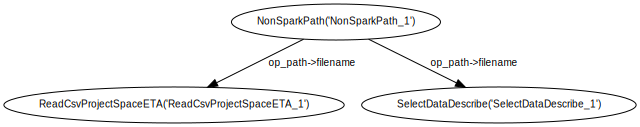

In [8]:
pipe.show()

In [9]:
pipe.execute()

log path: /tmp/tmp9dozrgay/pipeline_sd_1


{}